<a href="https://colab.research.google.com/github/mintijha/minti-jha-/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movies and tv shows clustering


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **GitHub Link -**

https://github.com/arshadmujawar2408/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/tree/main

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [110]:
# Import Libraries
import numpy as np
import pandas as pd

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

import scipy.stats as stats
from scipy.stats import chi2_contingency
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

# Importing warnings library
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [111]:
# Load Dataset
df=pd.read_csv('https://raw.githubusercontent.com/arshadmujawar2408/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')

### Dataset First View

In [112]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [113]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [114]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [115]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [116]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [117]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

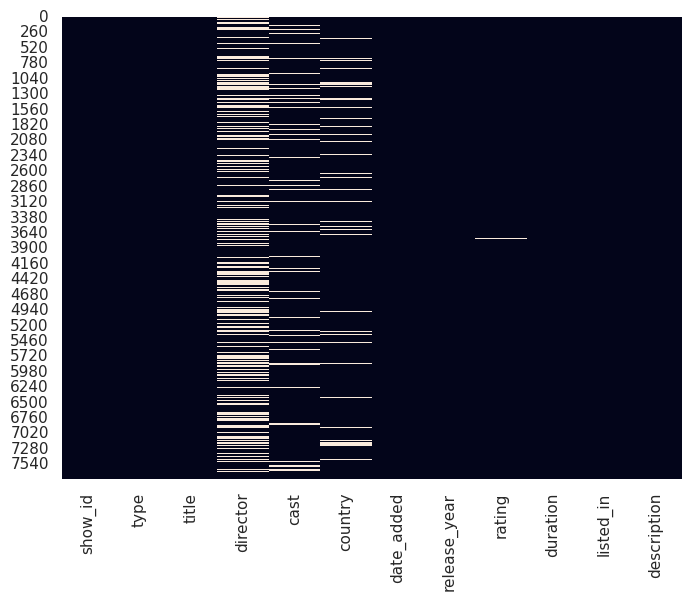

In [118]:
# Visualizing the missing values
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

The dataset used for Netflix movies and TV shows clustering includes information on multiple features of the titles, such as genre, director, cast, rating, release year, duration, and type. It consists of 7787 rows and 12 columns.

However, some columns, such as director, cast, and country, contain null values that need to be addressed during the data analysis process.

## ***2. Understanding Your Variables***

In [119]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [120]:
# Dataset Describe
df.describe(include="all")


show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description : The Summary description

### Check Unique Values for each variable.

In [121]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [122]:
# Write your code to make your dataset analysis ready.
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [123]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [124]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)
df.dropna(subset=['date_added'], inplace=True)

In [125]:
df.shape

(7777, 12)

In [126]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [127]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [128]:
# datatype of duration
df.duration.dtype

dtype('int64')

In [129]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

dtype
show_id       object
type          object
title         object
director      object
cast          object
country       object
date_added    object
release_year   int64
rating        object
duration       int64
listed_in     object
description   object

In [130]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [131]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [132]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}
# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_map,inplace=True)
# Print the unique values in the 'rating' column to verify that the changes have been made
print(df['rating'].unique())


['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


### What all manipulations have you done and insights you found?

Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

Imputing missing values in the 'rating' column with the mode.

Choosed the primary country and primary genre for each entry in the dataframe to simplify the analysis.

Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

Converted the timestamp in the 'date_added' column to datetime format to fetch other details.And added new columns to the dataframe, such as 'month_added' and 'year_added', to gain more insights from the data.

Changed the values in the rating column by Creating a dictionary to map the current ratings to new ratings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -1    Content Type On Netflix:

([<matplotlib.patches.Wedge at 0x7fbab6d0b5b0>,
 [Text(-0.9070648963562528, -0.6222807033792873, 'Movie'),
  Text(0.9895252779208632, 0.6788517690598137, 'TV Show')],
 [Text(-0.4947626707397742, -0.339425838206884, '69.14%'),
  Text(0.5772230787871702, 0.39599686528489125, '30.86%')])

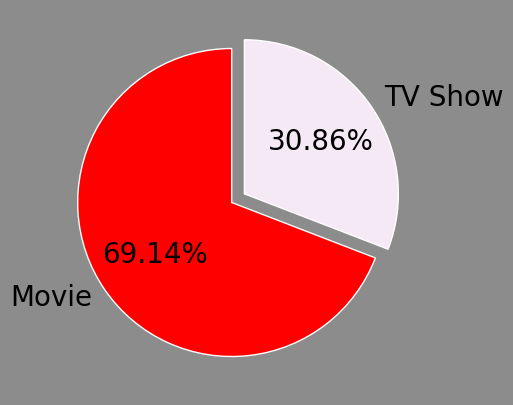

In [133]:
# Chart - 1 visualization code
# Pie chart showing percentage of toal movies and TV shows.
# Choose this facecolor so as to give style of netflix
fig, ax = plt.subplots(figsize=(5,5),facecolor="#8C8C8C")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['type'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Movie', 'TV Show'],shadow=False,
       startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])


##### 1. Why did you pick the specific chart?

I picked a pie chart to visualize the percentage of total movies and TV shows because it effectively represents the proportion of each category in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

Movies uploaded on Netflix are more than twice the TV Shows uploaded.
This dose not implies that movies are more indulging that of TV Shows.
Beacuase TV shows may have several seasons which consits of number of episodes.
Duration of TV shows are much more that of movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**

The pie chart can highlight the proportion of movies and TV shows in the platform's library. If TV shows have a larger share, it indicates a higher demand for episodic content

Understanding the distribution of movies and TV shows can help in segmenting the user base and tailoring marketing strategies accordingly

**Negative growth insights:**

The pie chart alone may not provide direct insights into negative growth areas. However, if certain genres or types of content within movies or TV shows have significantly lower representation, it could indicate potential areas for improvement.


#### Chart -2  Number of Movies and TV Shows added on netflix.

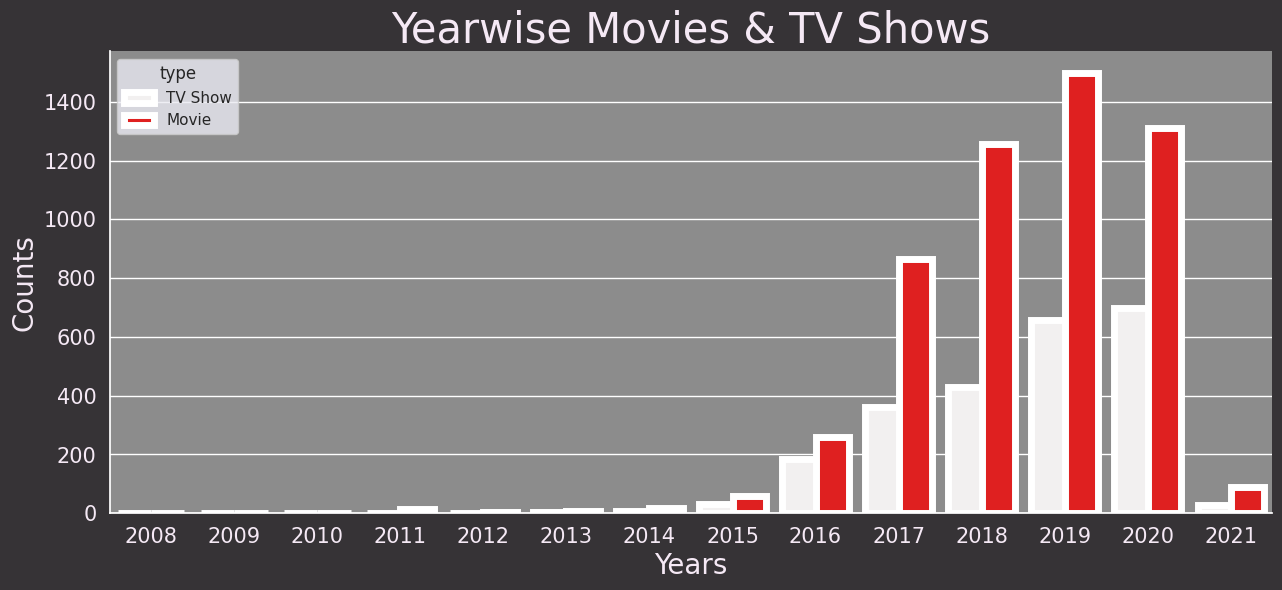

In [134]:
# Chart - 2 visualization code
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='year_added', hue='type',lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)


##### 1. Why did you pick the specific chart?

Because  this chart is effective in presenting the yearly distribution of movies and TV shows, allowing viewers to quickly compare the counts for each year and see any trends or patterns.

##### 2. What is/are the insight(s) found from the chart?

TV shows are incresing continuosly.
Movies were incresing continuosly but after 2019 there is fall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**

By analyzing the counts of movies and TV shows added each year, businesses can identify which years had a high demand for content.

The differentiation between movies and TV shows in the chart allows businesses to understand the audience's preferences for each type of content.

**Negative business impact**

the specific code provided doesn't give direct insights into negative trends. However, if the chart were to display a consistent decline in counts over the years or a significant drop in certain years, it could indicate a potential challenge or a declining demand for content.



#### Chart - 3 DIstribution of movies and tv shows in netflix dataset

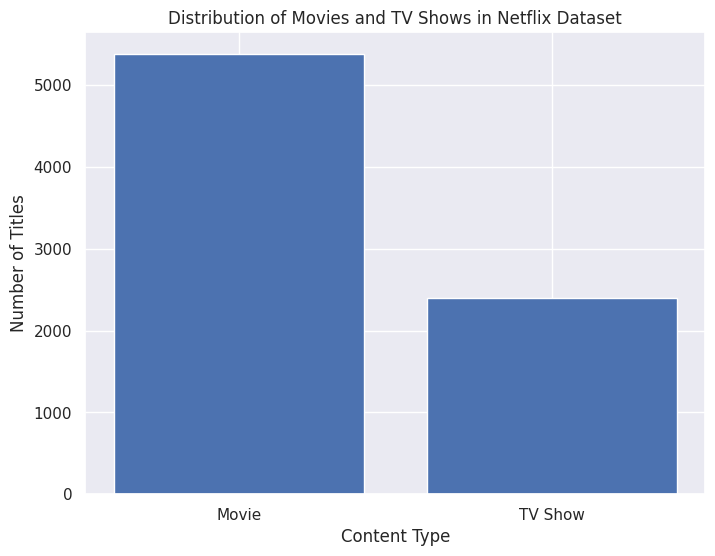

In [135]:
# Chart - 3 visualization code
# Chart - 1 visualization code
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a common choice for displaying the distribution of categorical data, such as the number of movies and TV shows in the Netflix dataset. It allows for easy comparison between categories and can provide a clear visualization of the overall distribution of content types in the dataset. Therefore, a bar chart is an appropriate choice for this specific dataset and research question.

##### 2. What is/are the insight(s) found from the chart?

The majority of the content in the Netflix dataset is Movies, as they have a higher count than TV shows.

The distribution of movies and TV shows in the Netflix dataset is not equal, which indicates that Netflix has a preference towards movies.

The number of TV shows in the dataset is still significant, which suggests that Netflix also invests in producing and acquiring TV shows for its platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart may help create a positive business impact for Netflix. Knowing that the majority of the content in the Netflix dataset is Movies, and that Netflix has a preference towards Movies, may inform decisions related to content production and acquisition. For instance, Netflix may choose to allocate more resources towards producing and acquiring Movies in order to attract more viewers and subscribers.

#### Chart - 4 Pie chart

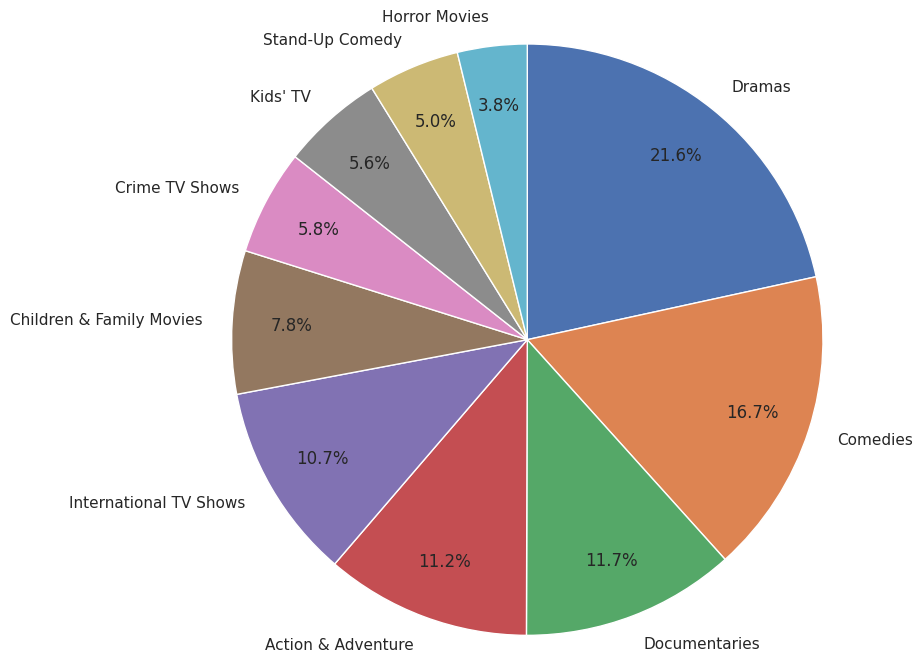

In [136]:
# Chart - 4 visualization code
top_genres = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,radius=1.2, startangle=90, counterclock=False)
plt.show()

##### 1. Why did you pick the specific chart?

 picked the pie chart because it's a great way to show the distribution of categorical data. In this case, we are looking at the distribution of the top 10 genres in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows the percentage share of each of the top 10 genres in the dataset. The insight we can gain from this chart is that the most popular genre in the dataset is dramas, followed by comedies and documentries. It also shows that the top 10 genres make up a significant portion of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can help create a positive business impact by allowing Netflix to better understand the content preferences of their audience. They can use this information to make more informed decisions about what type of content to acquire and produce, which can help increase their viewership and revenue.

#### Chart - 5 Countries having maximum Movies and TV Shows

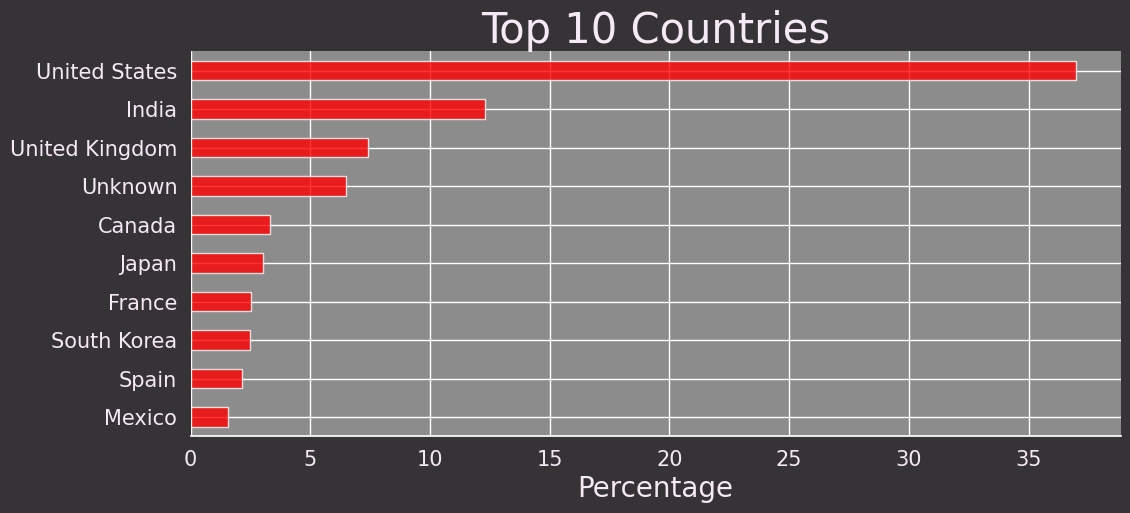

In [137]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(12,5),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
(df['country'].value_counts().sort_values()/df.shape[0]*100)[-10:].plot(kind='barh', ax=ax,color ='red',alpha=0.8)
ax.tick_params(axis= 'x', colors='#F5E9F5',labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Countries", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a horizontal bar chart. It was chosen to visualize the distribution of countries in a dataset, specifically the top 10 countries.

##### 2. What is/are the insight(s) found from the chart?

Unites State tops the in list of maximum number of movies and TV shows.
Followed by India, UK and Japan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**
The chart highlights the top 10 countries with the highest percentages, indicating the countries where the business has a significant presence or customer base.

The chart provides information about the distribution of countries, which can help identify emerging markets or regions with untapped potential. Businesses can utilize this insight to explore new market opportunities

**Negative business impact**

if the chart reveals a decline in the presence or market share of key countries, indicating potential challenges or loss of business opportunities in those regions. Additionally, if the top 10 countries shown in the chart are not the target markets or if they have a low purchasing power, it may limit the potential for business growth.


#### Chart - 6 Top 10 Countries Producing Movies & TV Shows on Netflix

In [138]:
#  Filter the data for movies and TV shows separately
movie_countries = df[df['type'] == 'Movie']
tv_show_countries = df[df['type'] == 'TV Show']

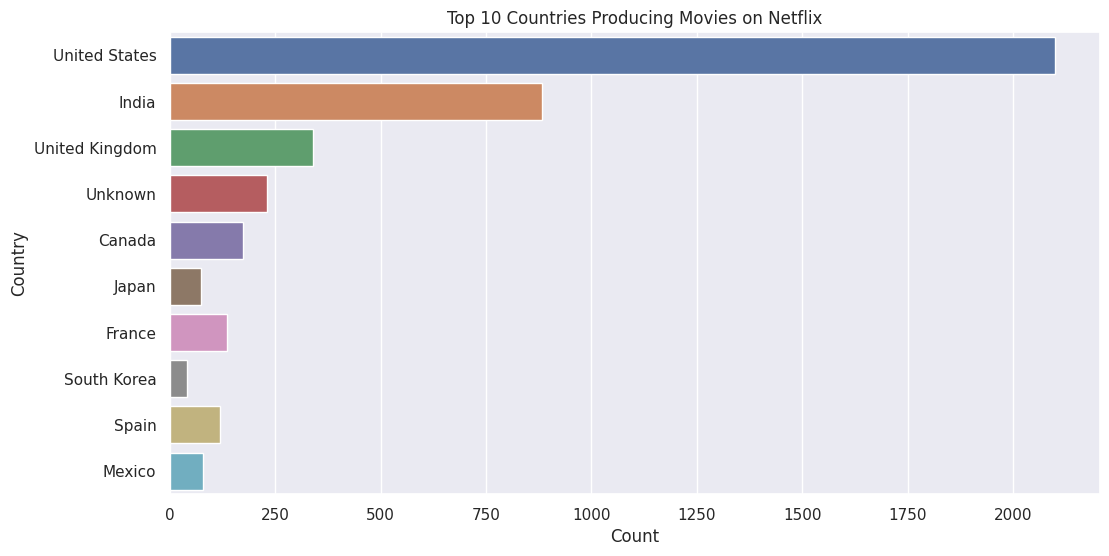

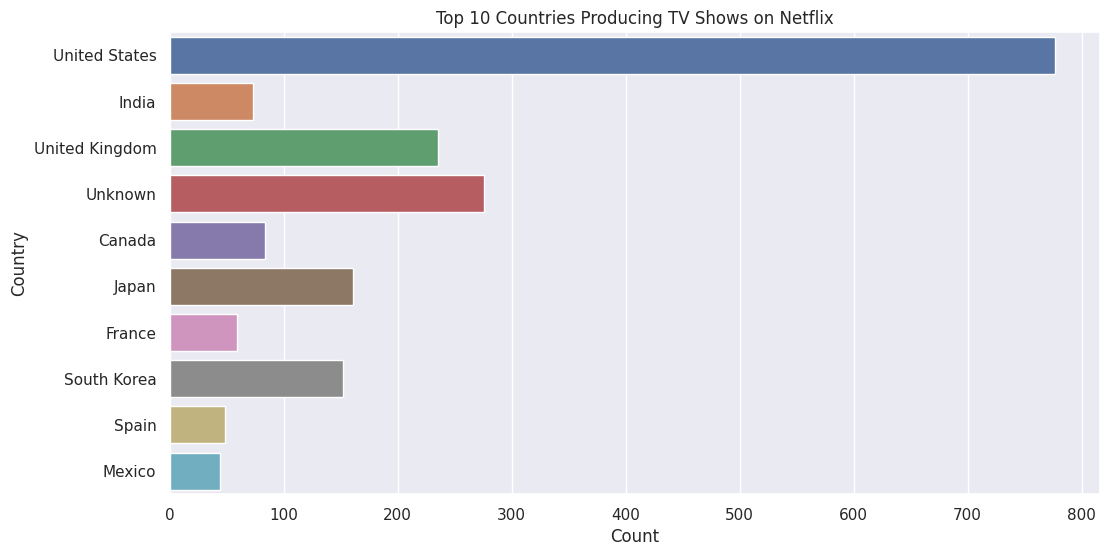

In [139]:
# Chart - 6 visualization code
# Plot the count of movies in the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=df['country'].value_counts().index[:10], data=movie_countries)
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Plot the count of TV shows in the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=df['country'].value_counts().index[:10], data=tv_show_countries)
plt.title('Top 10 Countries Producing TV Shows on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()



##### 1. Why did you pick the specific chart?

The countplot function is suitable for this task as it displays the frequency count of each category (in this case, countries) on one axis and the count on the other axis. It provides a clear representation of the distribution of movies and TV shows across different countries.

##### 2. What is/are the insight(s) found from the chart?

Comparison of production: can compare the count of movies and TV shows in the top 10 countries to understand the production patterns.

Dominant countries: By examining the chart, can identify the countries that have a higher count of movies and TV shows. This information can indicate the countries that are major contributors to the content available on Netflix like US, India, and UK.

Country-specific preferences: The chart can also showcase the content preferences of different countries. You can observe which countries produce and consume more movies or TV shows, potentially highlighting cultural or regional preferences.

Disparities between movies and TV shows: Analyzing the count separately for movies and TV shows can uncover any disparities in production. It may reveal if certain countries have a stronger emphasis on one type of content compared to the other.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Targeted content acquisition: By understanding the production patterns and preferences of different countries, Netflix can strategically acquire content that aligns with the preferences of their target audience. This can help in attracting and retaining subscribers in specific regions.

Localization and regional content: Insights about country-specific preferences can guide Netflix in creating localized and region-specific content. This can lead to increased engagement and viewership in those countries, fostering a positive user experience.

Market expansion: Identifying countries with a higher count of movies and TV shows can provide insights into potential markets for expansion. Netflix can prioritize expanding its presence in countries where there is already a substantial demand for their content.

Regarding insights that may lead to negative growth, it's challenging to provide a specific reason without analyzing the actual data and insights obtained. However, there are a few potential scenarios where negative growth could occur:

Oversaturation of content: If the analysis reveals that certain countries have an oversaturation of movies or TV shows, it may indicate a highly competitive market. In such cases, acquiring additional content in those markets may lead to increased competition and reduced market share for Netflix.

Cultural mismatch: If the analysis shows that Netflix is not aligning its content offerings with the preferences of specific countries, it may result in lower engagement and reduced growth in those markets. It's crucial for Netflix to tailor their content strategy to fit the cultural preferences of their target audience in each country.

Limited growth opportunities: If the analysis indicates a lack of growth potential in certain countries or regions, where the count of movies and TV shows is consistently low, it may result in limited opportunities for expansion and lower overall business growth.



#### Chart - 7 Number of shows on Netflix for different age groups

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

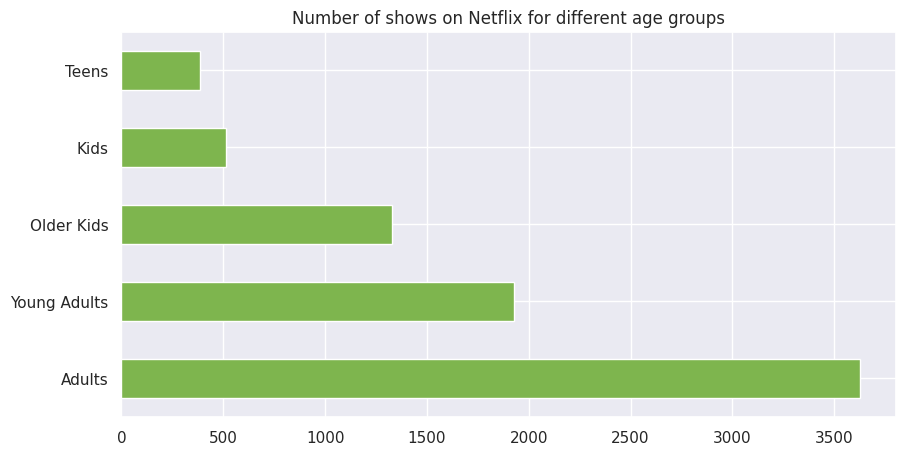

In [140]:
# Chart - 7 visualization code
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
a=df.rating.value_counts().plot(kind='barh',color='#7eb54e')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?


Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the given plot found the most of the shows and movies are made for adults audiences and followed by the young audiences ,older kids and kids.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to creator to choose content according to the audience and made the movies and tv shows acoording to the interest of the audiences.

#### Chart - 8  Top 10 Directors

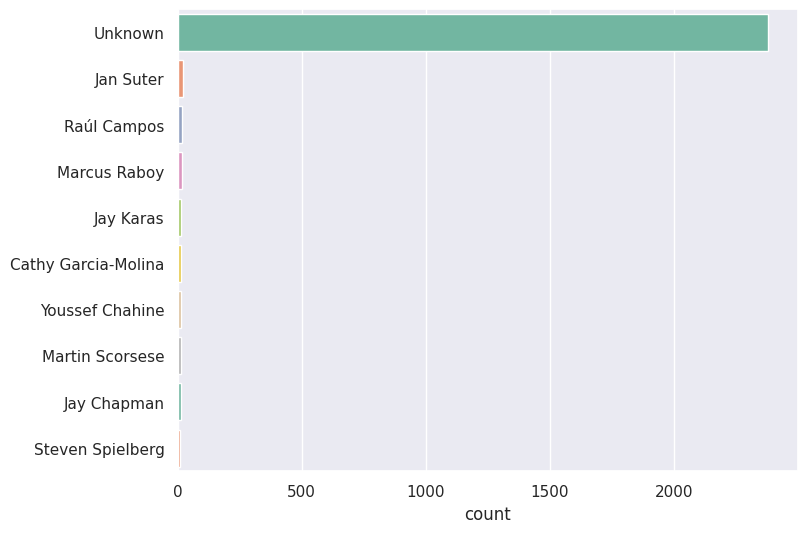

In [141]:
# Chart - 8 visualization code
# Graph for top 10 directors
directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

This visual shows Jan suter and Raul Campos are the leading directors, with abundant experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to choose a better and experience director for the movie and tv series.

#### Chart - 9 Type and Ratings

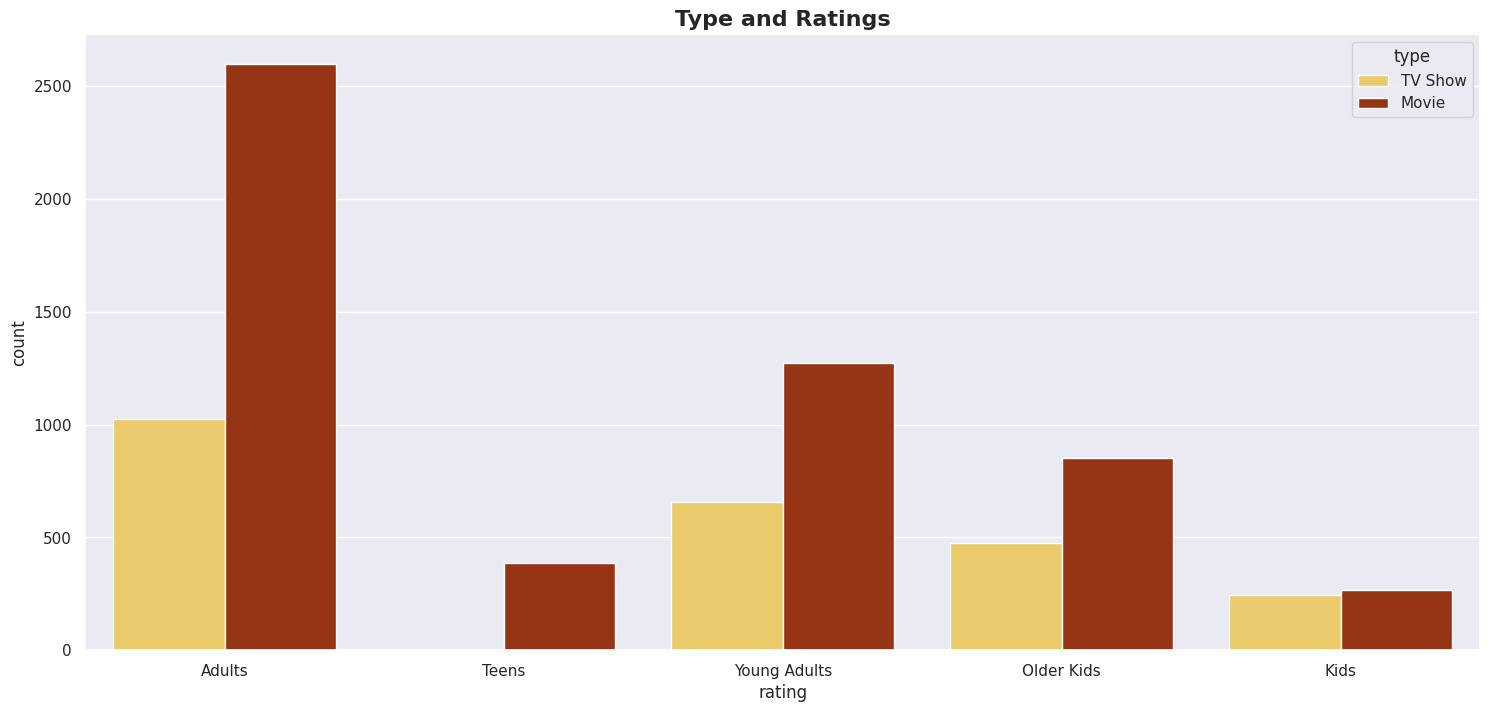

In [142]:
# Chart - 9 visualization code
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="afmhot_r")
plt.title('Type and Ratings',size='16',fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

 To check the type of shows ans it's ratings.

##### 2. What is/are the insight(s) found from the chart?

As you can see Tv mature audience got highest ratings for movies and also for shows. followed by young adults content for movies then for older kids and kids content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most for profit.

#### Chart - 10    Most occured word in title.

In [143]:
#Importing WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

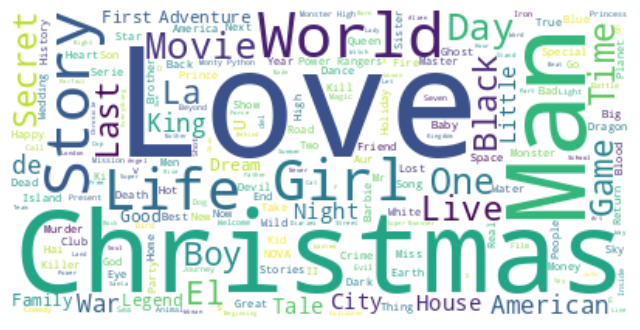

In [144]:
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

 To check the most occured word in title.

##### 2. What is/are the insight(s) found from the chart?

 It shows the most occured words are "Love", "man" "christmas",, "world" "movie" and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No it wil not help to create positive business impact.

#### Chart - 11  Releases of movies month wise

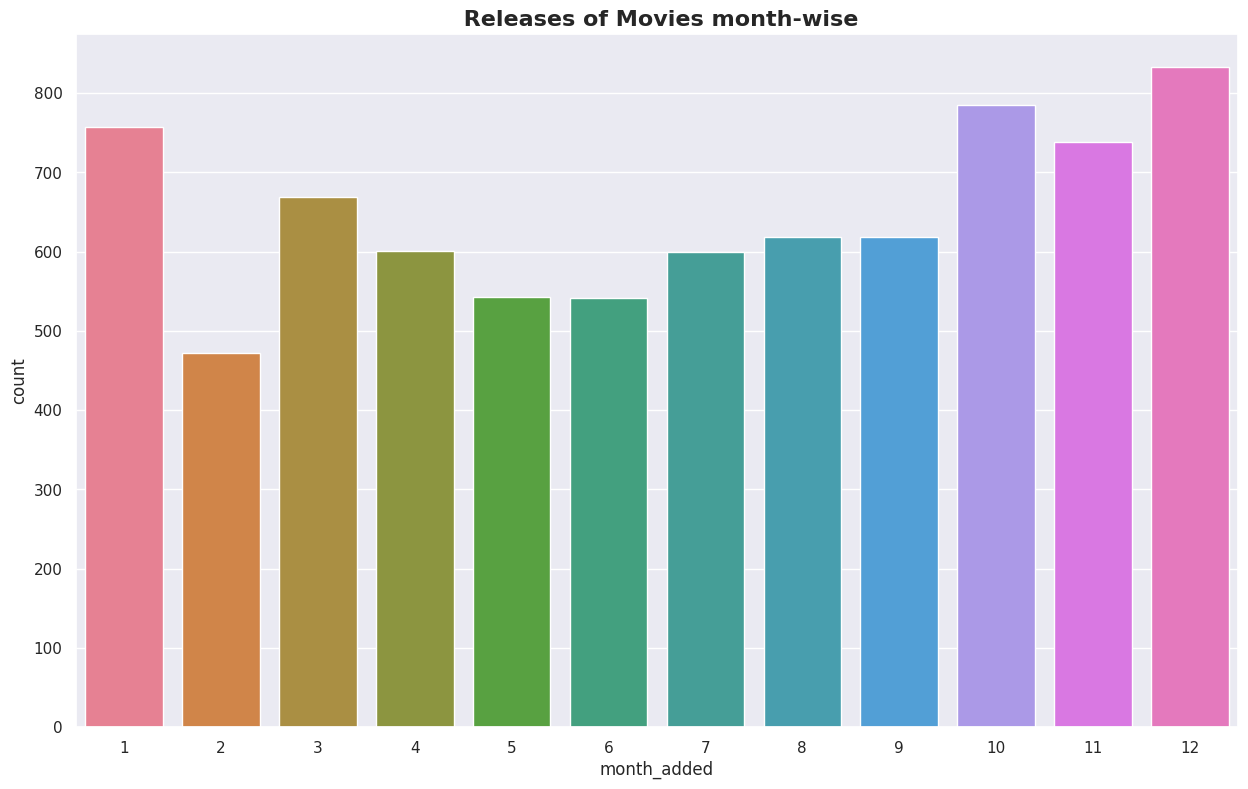

In [145]:
# Chart - 4 visualization code
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df,palette="husl")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check Releases of Movies month-wise.

##### 2. What is/are the insight(s) found from the chart?

We found that the month of january, october, november and december have highest releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which month to release to get more pofit and impact on audience.

#### Chart - 12 Total releases for last 10 years

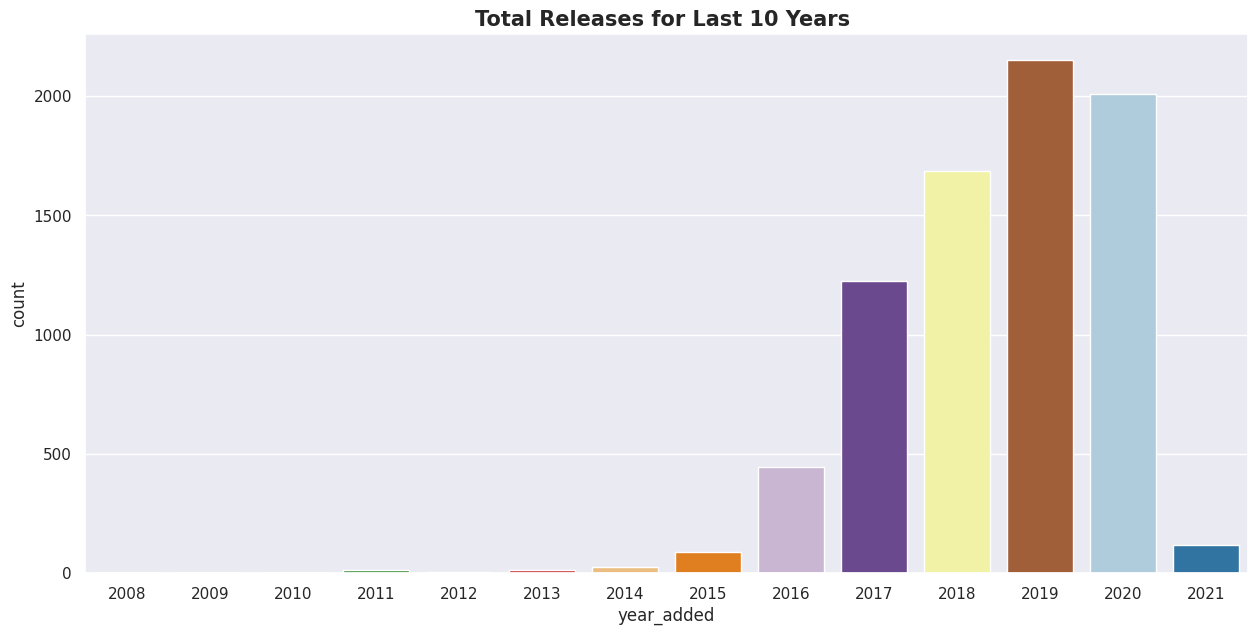

In [146]:
# Chart - 12 visualization code
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Paired")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the total Releases for Last 10 Years.

##### 2. What is/are the insight(s) found from the chart?

The number of releases have significantly increased after 2015 and have dropped in 2021 because of Corona situation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is just to check which year how many contents released.

#### Chart - 13 Top generes on netflix.

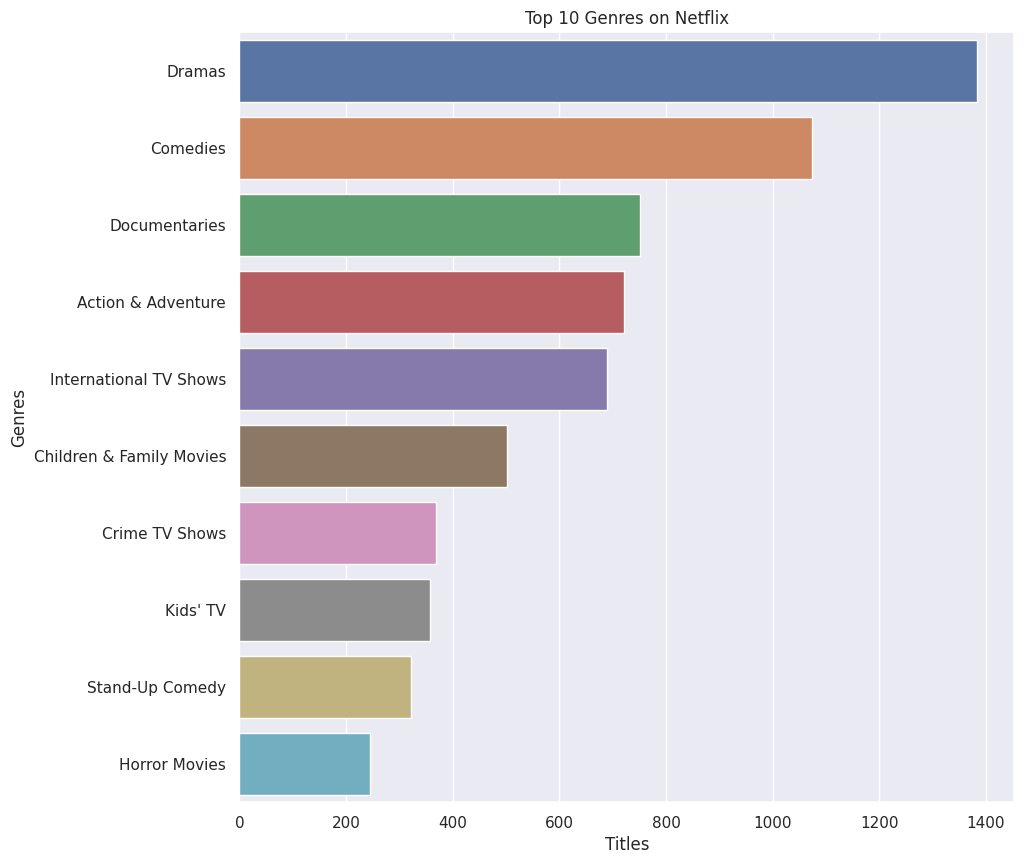

In [147]:
# Chart - 13 visualization code
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 10 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

To check the geners on netflix.

##### 2. What is/are the insight(s) found from the chart?

We found that the dramas takes first place followed by comedies and documentries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insight will help to create positive business because movies in genere of  drama, comedy and documentries are mostly produced. so people watch them most that will surely help towards a positive growth.

#### Chart - 14 - Correlation Heatmap

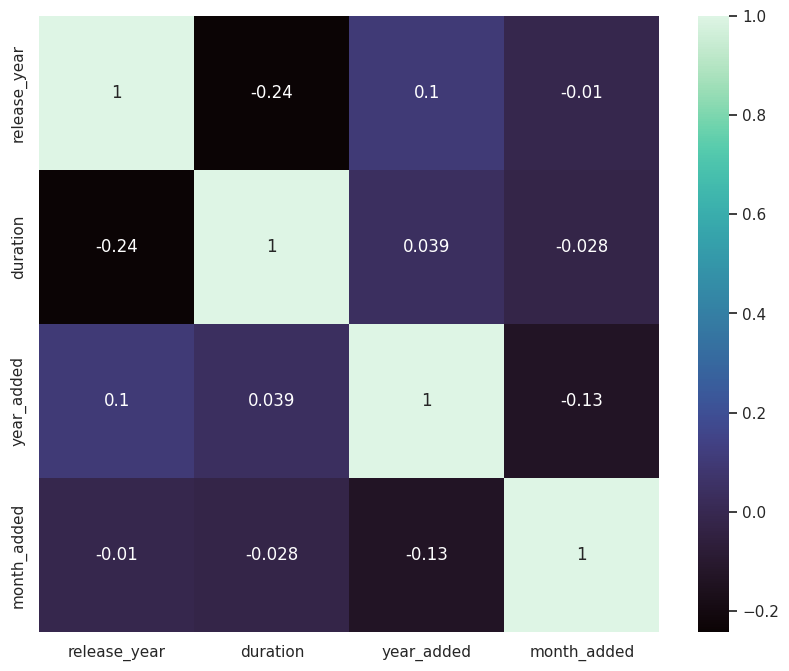

In [148]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap shows the correlation coefficients between different numerical columns of the Netflix dataset.

The heatmap uses a color scale to represent the correlation coefficients, where light colour represents positive correlation, dark colour represents negative correlation. The annotation parameter is set to True, which displays the correlation coefficient value inside each cell of the heatmap.

##### 2. What is/are the insight(s) found from the chart?

This visualization can be helpful in identifying the strength and direction of the relationship between different variables in the dataset. By analyzing the heatmap, we can see which variables have a strong positive or negative correlation with each other. This information can be useful in making predictions and building machine learning models.

Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

We can see that duration and release year are negatively correlated by 24%.

year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot

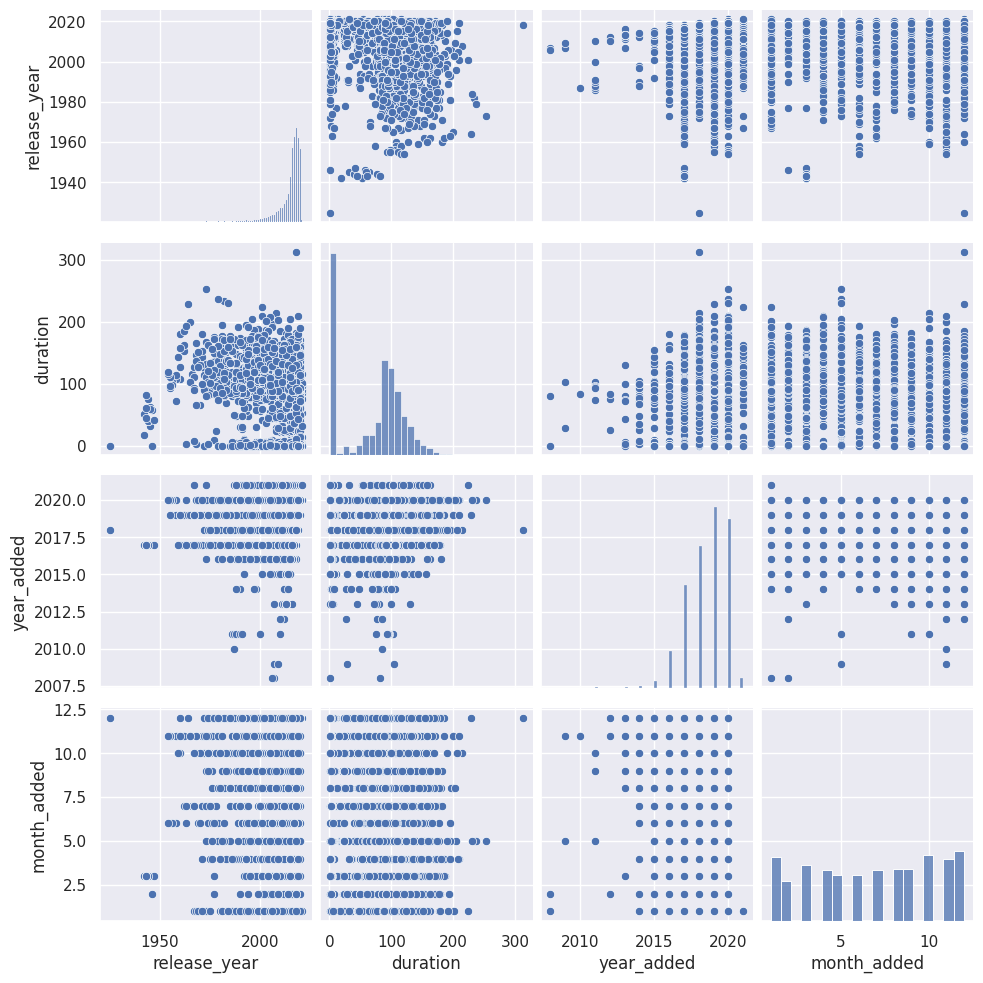

In [149]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.

##### 2. What is/are the insight(s) found from the chart?

The distribution of each variable, We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

Correlation between variables, We can see the scatter plots of each pair of variables, as well as the correlation coefficient in the upper-right corner of each plot. There seems to be a positive correlation between the release year and the duration of movies and TV shows, indicating that newer movies and TV shows tend to be longer.

Outlier, We can also see any outliers in the data from the scatter plots. There seems to be a movie with a very long duration compared to the rest of the dataset

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The difference in the average duration of movies and TV shows on Netflix.

Hypothesis 2: Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Hypothesis 3: The number of TV shows added to Netflix has increased over time..

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix..

#### 2. Perform an appropriate statistical test.

In [150]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

In [151]:
# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")


Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-sample t-test. This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations), and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance.

##### Why did you choose the specific statistical test?

The two-sample t-test assumes that the samples are normally distributed, the variances of the two samples are not equal, and the samples are independent. In this case, we assumed that the duration of movies and TV shows on Netflix are normally distributed, and that the two samples are independent. The assumption of unequal variances was also made because the variance of movie durations and TV show durations may be different due to the nature of the content.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Alternate hypothesis : There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States..

#### 2. Perform an appropriate statistical test.

In [152]:
# Perform Statistical Test to obtain P-Value
# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")


Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used here is a two-sample t-test. This test is used to compare the means of two independent samples and determine if they are statistically different from each other.

##### Why did you choose the specific statistical test?

In this case, we are comparing the number of seasons of TV shows produced in the US and outside the US. We chose this test because we want to determine if there is a statistically significant difference in the mean number of seasons between the two groups. We also assumed that the variances of the two groups are not equal, so we set the equal_var parameter to False when calling the ttest_ind() function.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The mean number of TV shows added to Netflix per year has not changed over time.

Alternative hypothesis: The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [153]:
from scipy import stats

In [154]:
# Perform Statistical Test to obtain P-Value
# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

p-value: 0.062841095395341
Failed to reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

In this code, a linear regression is performed using the stats.linregress function from the scipy module. The purpose of the regression is to test for a positive slope (i.e., an increase over time) in the number of TV shows added to Netflix each year. The p-value is then calculated based on the results of the regression.

A p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the number of TV shows added to Netflix has not increased over time (i.e., the slope is zero). The alternative hypothesis is that the number of TV shows added to Netflix has increased over time (i.e., the slope is positive)..

##### Why did you choose the specific statistical test?

The specific statistical test used in this code is a linear regression with a hypothesis test on the slope coefficient. This is appropriate because we are interested in testing for a trend over time, and a linear regression allows us to model the relationship between the year and the number of TV shows added to Netflix. The p-value calculated from the regression provides evidence for or against the alternative hypothesis that there is a positive trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [155]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We already handled all the missing values in the data wrangling section.

### 2. Handling Outliers

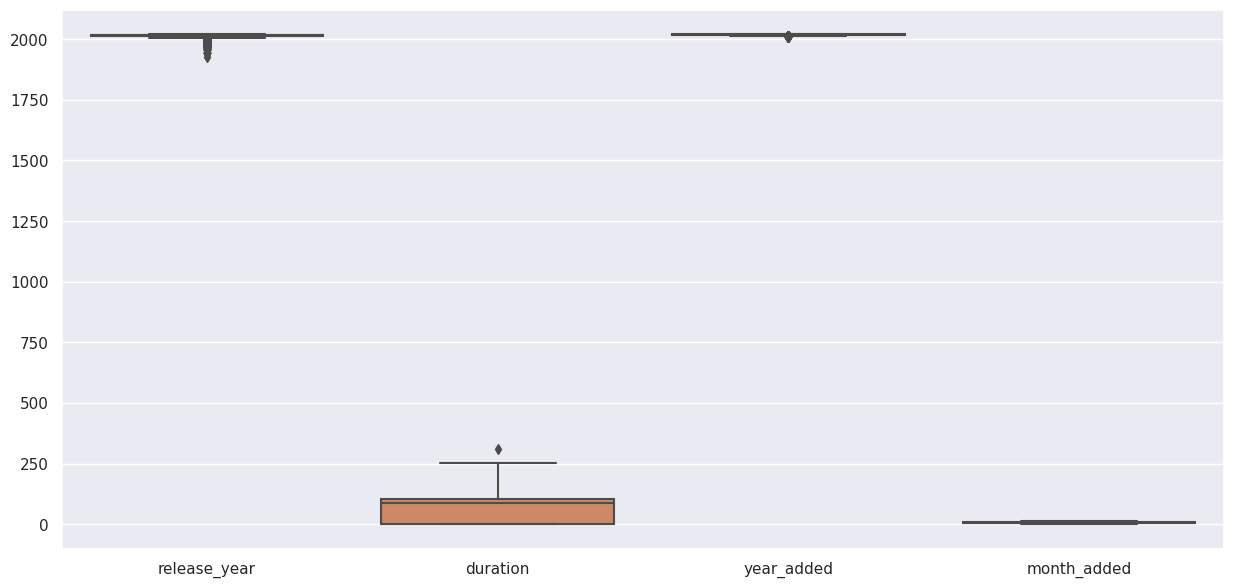

In [156]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

No need to handle the outliers.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

We will cluster the shows on Netflix based on the following attributes:

Director,
Cast,
Country,
Listed in (genres),
Description

In [157]:
# Combine clustering attributes into a single column
df['clustering_attributes'] = (df['director'].fillna('') + ' ' +
                               df['cast'].fillna('') + ' ' +
                               df['country'].fillna('') + ' ' +
                               df['listed_in'].fillna('') + ' ' +
                               df['description'].fillna(''))


In [158]:
df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 1. Expand Contraction

In [159]:
# Expand Contraction

# Contraction mapping dictionary
contraction_mapping = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    # Add more contractions and their expanded forms as needed
}

# Function to expand contractions
def expand_contractions(text):
    contraction_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_match = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_match = expanded_match.capitalize() if match[0].isupper() else expanded_match
        return expanded_match

    expanded_text = contraction_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(expand_contractions)


In [160]:
df['clustering_attributes']

0       Unknown João Miguel, Bianca Comparato, Michel ...
1       Jorge Michel Grau Demián Bichir, Héctor Bonill...
2       Gilbert Chan Tedd Chan, Stella Chung, Henley H...
3       Shane Acker Elijah Wood, John C. Reilly, Jenni...
4       Robert Luketic Jim Sturgess, Kevin Spacey, Kat...
                              ...                        
7782    Josef Fares Imad Creidi, Antoinette Turk, Elia...
7783    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
7784    Unknown Nasty C Unknown Documentaries In this ...
7785    Unknown Adriano Zumbo, Rachel Khoo Australia I...
7786    Sam Dunn Unknown United Kingdom Documentaries ...
Name: clustering_attributes, Length: 7777, dtype: object

#### 2. Lower Casing

In [161]:
# Lower Casing
# Convert the text in 'clustering_attributes' column to lowercase
df['clustering_attributes'] = df['clustering_attributes'].str.lower()

#### 3. Removing Punctuations

In [162]:
# Remove Punctuations
 #Remove punctuation from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [163]:
# Remove URLs & Remove words and digits contain digits

In [164]:
# Remove URLs from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))

# Remove words and digits containing digits from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: re.sub(r'\w*\d\w*|\d+', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [165]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [167]:
# Remove White spaces
# Remove leading and trailing whitespaces from 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: x.strip())


#### 7. Tokenization

In [168]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [169]:

# Download WordNet corpus
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    lemmatized_text = ' '.join(lemmas)  # Join the lemmatized tokens back into a string
    return lemmatized_text

# Apply lemmatization to the 'clustering_attributes' column
df['clustering_attributes_lemmatized'] = df['clustering_attributes'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [170]:
# Tokenization
# Tokenize the 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: word_tokenize(x))

#### 8. Text Normalization

In [171]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#Done

##### Which text normalization technique have you used and why?

.The text normalization technique used in the code snippet is lemmatization. Lemmatization is the process of reducing words to their base or root form, known as the lemma. It helps in standardizing the text by transforming different inflected forms of a word into a common base form.

Lemmatization is preferred over other normalization techniques like stemming because it produces more meaningful lemmas that are actual words and retain the semantic meaning of the original word. Stemming, on the other hand, can sometimes result in truncated or non-words. By using lemmatization, we ensure that the lemmatized tokens maintain their grammatical properties and can be easily understood by humans and used in further analysis or processing.

#### 10. Text Vectorization

In [172]:
# clustering tokens saved in a variable
clustering_data = df['clustering_attributes']

In [173]:
# Vectorizing Text
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [174]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 221790 stored elements in Compressed Sparse Row format>

In [175]:
# Shape of X
X.shape

(7777, 20000)

In [176]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 221790 stored elements in Compressed Sparse Row format>

##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. This technique is commonly used for text classification and information retrieval tasks. It assigns weights to each word in the document based on its frequency and rarity across the corpus. This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [177]:
#Not Needed

#### 2. Feature Selection

In [178]:
# Select your features wisely to avoid overfitting
#Not Needed

### 5. Data Transformation

In [179]:
# Transform Your data
#Not Needed

### 6. Data Scaling

In [180]:
# Scaling your data
#Not Needed

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes
as the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.


In [181]:
# using PCA to reduce dimensionality
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X.toarray())

PCA()

In [182]:
PCA()

PCA()

Text(0, 0.5, 'cumulative explained variance')

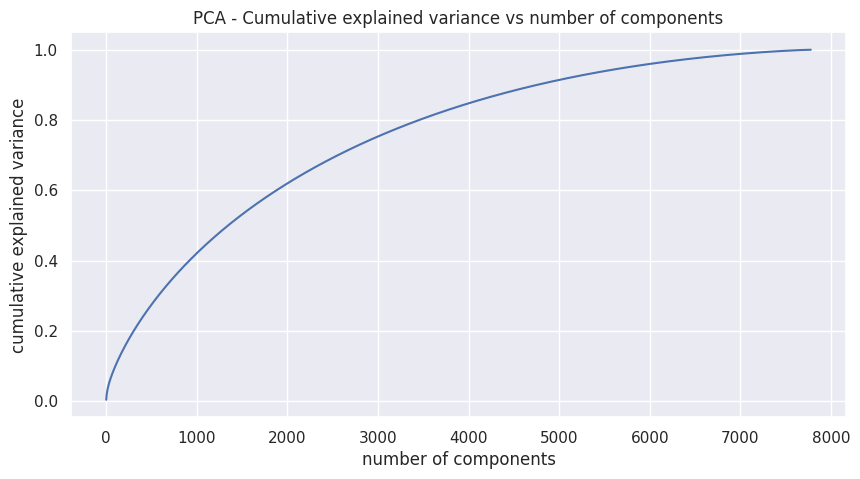

In [183]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


We find that 100% of the variance is explained by about 90 components.
Also, more than 80% of the variance is explained just by 60 components.
Hence to simplify the model, and reduce dimensionality, we can take the top   60 components, which will still be able to capture more than 80% of variance.

In [184]:
# reducing the dimensions to 60 using pca
pca = PCA(n_components=60,random_state=42)
pca.fit(X.toarray())

PCA(n_components=60, random_state=42)

In [185]:
# transformed features
x_pca = pca.transform(X.toarray())

In [186]:
# shape of transformed vectors
x_pca.shape

(7777, 60)

In [187]:
x_pca

array([[ 0.07916363, -0.03734116,  0.01015585, ..., -0.03510896,
         0.01051145,  0.00641754],
       [-0.03164569, -0.02591388,  0.0098174 , ..., -0.00999061,
         0.00676026,  0.01391895],
       [-0.02756894, -0.02691226, -0.00438636, ..., -0.0142509 ,
        -0.0135174 ,  0.01493422],
       ...,
       [ 0.07564947,  0.03725302, -0.00366408, ..., -0.01687122,
         0.0287929 ,  0.00960334],
       [ 0.08812997, -0.03232494,  0.00528114, ...,  0.00817667,
         0.00369997, -0.005991  ],
       [ 0.06237377,  0.10883354, -0.07765537, ..., -0.03174541,
         0.03049174, -0.01487149]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) is used for dimensionality reduction. PCA is a commonly used technique for reducing the dimensionality of high-dimensional data by transforming it into a lower-dimensional space while preserving the most important patterns or variations in the data.

PCA works by identifying the principal components, which are linear combinations of the original features that capture the maximum amount of variance in the data. By retaining a subset of the top principal components, it is possible to represent the data in a lower-dimensional space while still retaining a significant amount of information.

In the given code, the PCA algorithm is applied to the matrix X obtained from text vectorization. The fit method is used to calculate the principal components and their corresponding variances. The resulting PCA object can be further used for dimensionality reduction or other tasks such as visualization.

PCA is a popular choice for dimensionality reduction because it is computationally efficient, easy to implement, and provides a good balance between preserving information and reducing dimensionality. However, it is important to note that the appropriateness of PCA or any other dimensionality reduction technique depends on the specific characteristics and requirements of the dataset and the clustering task at hand..

### 8. Data Splitting

In [188]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Not needed

### 9. Handling Imbalanced Dataset

Not Needed



## ***7. ML Model Implementation***

### ML Model - 1  (K-Means)

In [189]:
# ML Model - 1 Implementation
wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS) values
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_  # Get the WCSS value for the current number of clusters
    wcss.append(wcss_iter)  # Append the WCSS value to the list

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0, 0.5, 'WCSS')

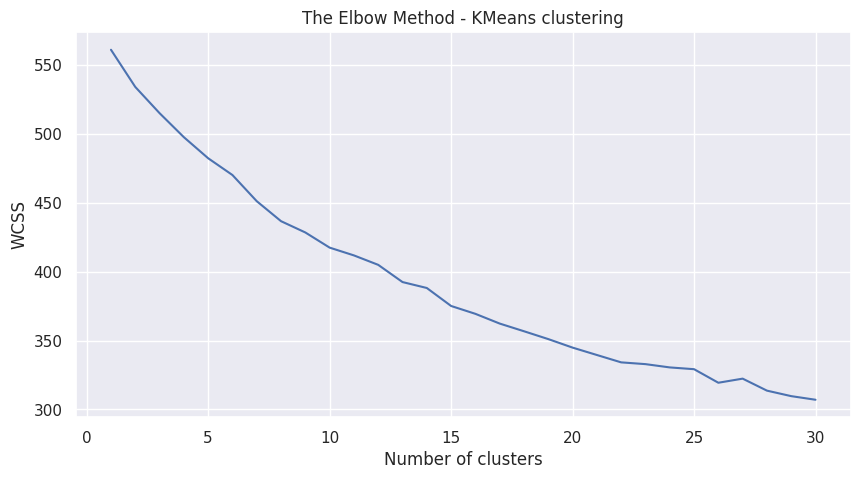

In [190]:
# Visualizing evaluation Metric Score chart
number_clusters = range(1, 31)  # Range of number of clusters
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### 2. Cross- Validation & Hyperparameter Tuning

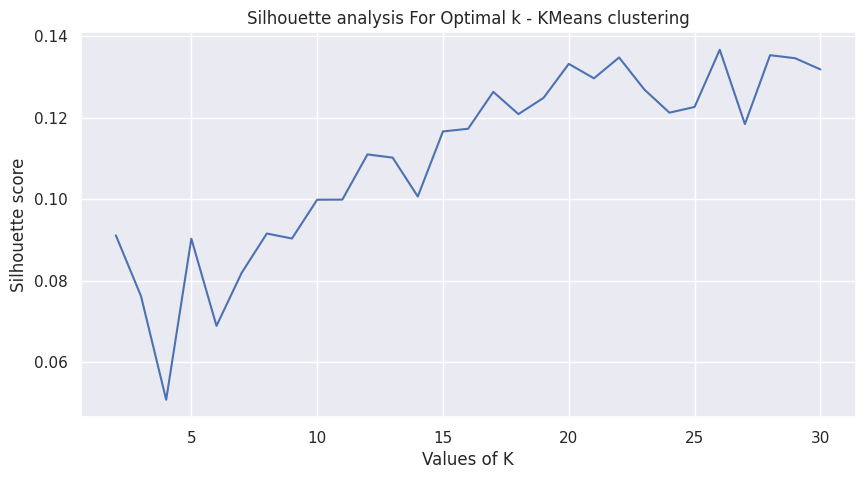

In [191]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2, 31)  # Range of number of clusters
silhouette_avg = []  # List to store the silhouette scores
for num_clusters in range_n_clusters:
    # Initialize k-means
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(x_pca)
    cluster_labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.


Building 6 clusters using the k-means clustering algorithm:



In [192]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [193]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(470.1638642624047, 0.06889319535977315)


In [194]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

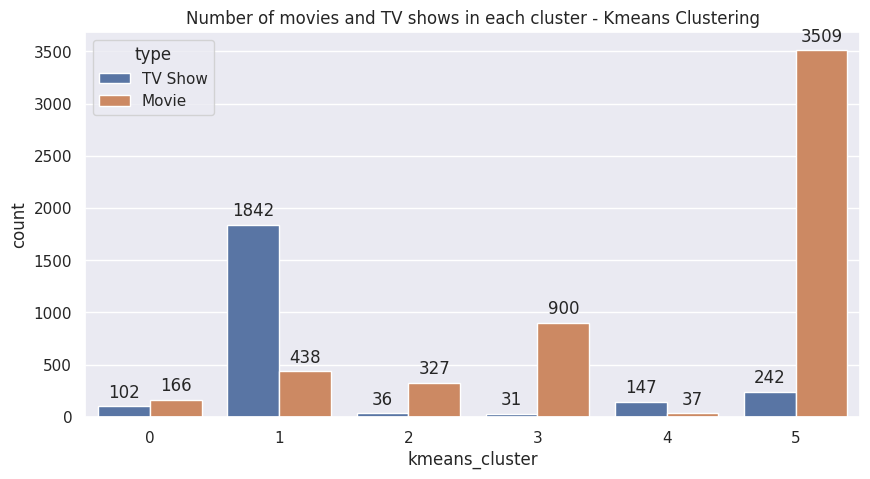

In [195]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Building wordclouds for different clusters built**


In [196]:
def kmeans_wordcloud():
    # Define the number of rows and columns for subplots
    rows = 2
    columns = 3

    # Create a new figure and set the figsize
    fig = plt.figure(figsize=(15, 10))

    # Iterate through the cluster numbers
    for cluster_num in range(6):
        # Initialize an empty string to store the words
        comment_words = ''
        # Define the stopwords set
        stopwords = set(STOPWORDS)

        # Filter the DataFrame for the current cluster number
        cluster_df = df[df['kmeans_cluster'] == cluster_num]

        # Iterate through the movie descriptions in the cluster
        for val in cluster_df['description'].values:
            # Typecast each value to string
            val = str(val)

            # Split the value into tokens
            tokens = val.split()

            # Convert each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            # Join the tokens back into a single string
            comment_words += " ".join(tokens) + " "

        # Create the WordCloud object with specified parameters
        wordcloud = WordCloud(width=400, height=300, background_color='black',
                              stopwords=stopwords, min_font_size=10).generate(comment_words)

        # Add a subplot to the figure
        ax = fig.add_subplot(rows, columns, cluster_num+1)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Cluster {cluster_num+1}')
        ax.axis("off")

    plt.tight_layout()
    plt.show()

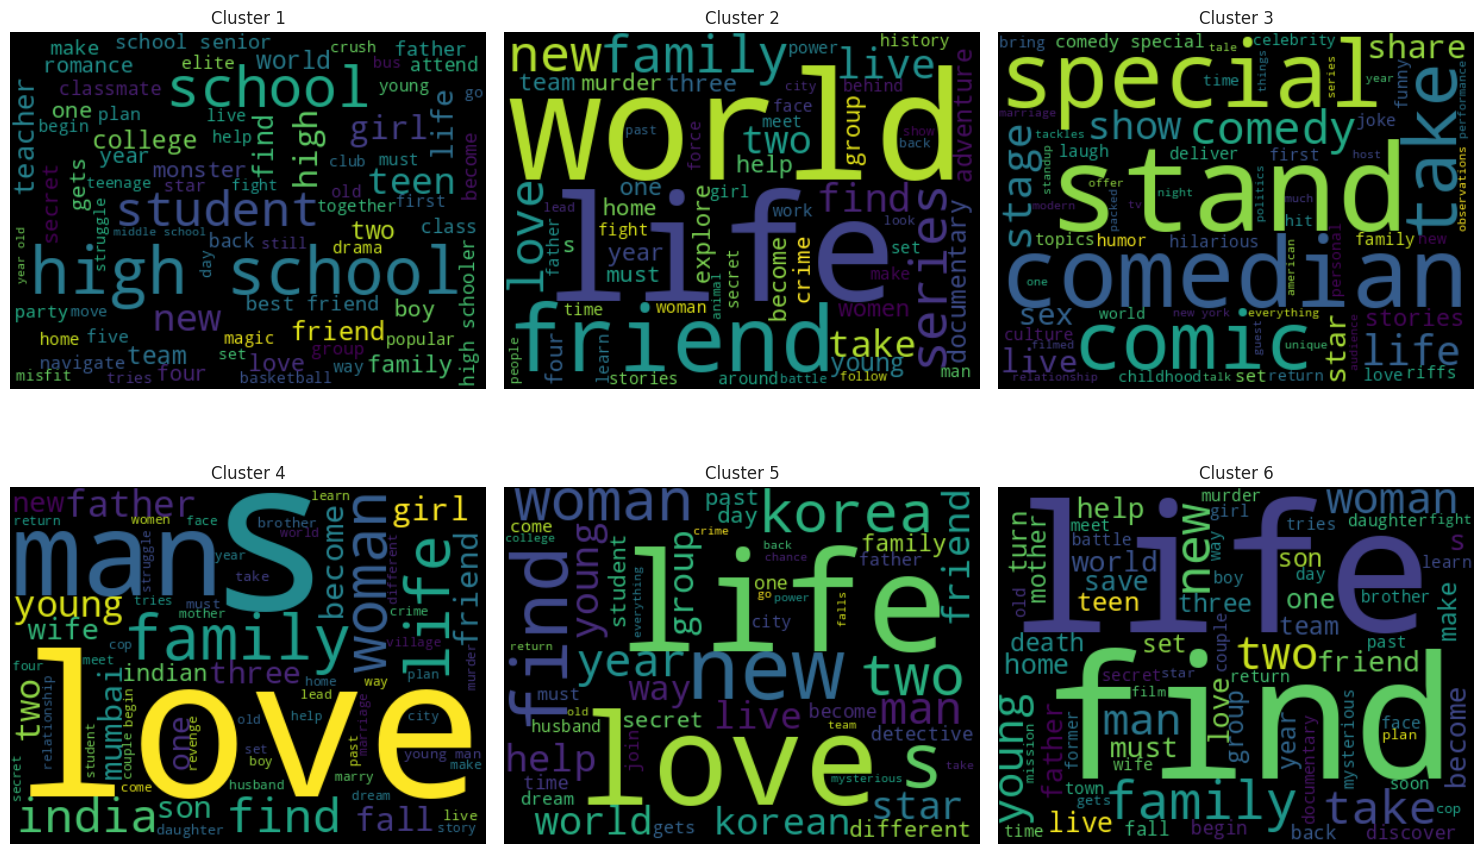

In [197]:
# Wordcloud for 6 clusters
kmeans_wordcloud()

##### Which hyperparameter optimization technique have you used and why?

In this code does not include hyperparameter optimization techniques such as GridSearchCV, RandomizedSearchCV, or Bayesian Optimization. I simply evaluates the silhouette score for different numbers of clusters using the KMeans algorithm.

### ML Model - 2  (Hierarchical Clustering)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

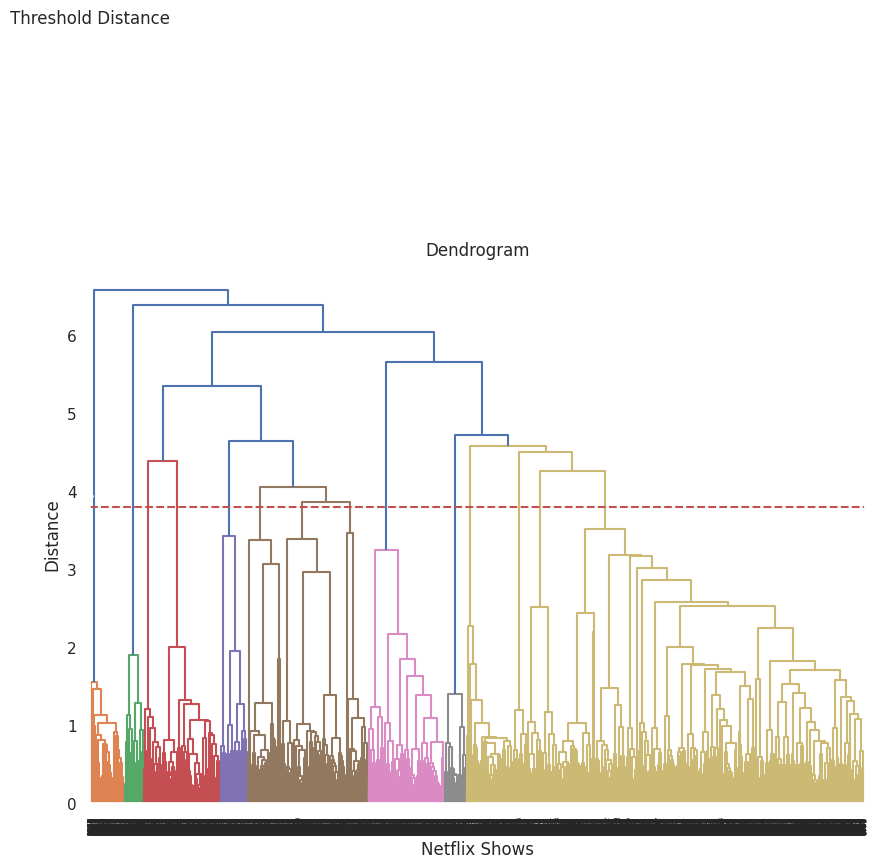

In [198]:
# Visualizing evaluation Metric Score chart# Building a dendrogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')

# Add a horizontal dashed line at the threshold distance to determine the number of clusters
plt.axhline(y=3.8, color='r', linestyle='--')

# Add a comment to explain the significance of the threshold distance
plt.annotate('Threshold Distance', xy=(0.5, 3.8), xytext=(0.5, 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.show()

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.


#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([0, 2, 1, ..., 5, 0, 5])

In [200]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

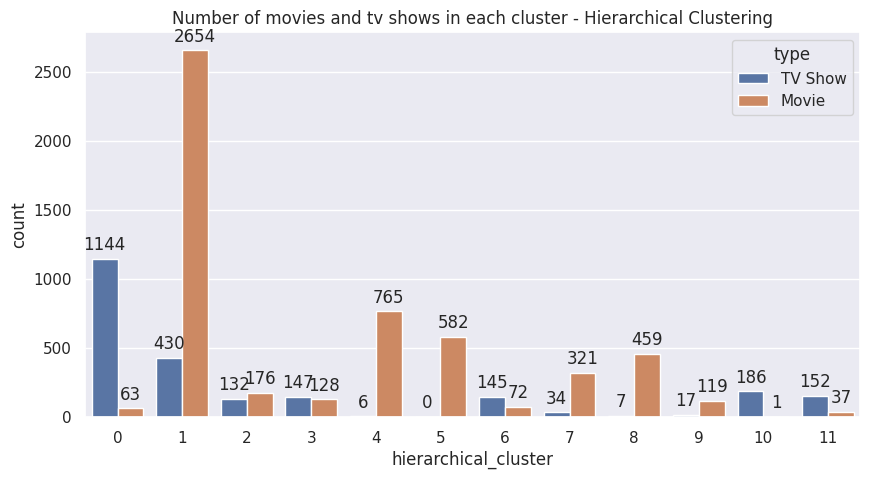

In [201]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Building wordclouds for different clusters built:**

In [202]:
def hierarchical_wordcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)



    # Iterate through the descriptions in the cluster
    for val in df[df['hierarchical_cluster'] == cluster_num].description.values:
        # Typecast each val to string
        val = str(val)

        # Split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='black',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Word Cloud - Cluster {cluster_num }')
    plt.tight_layout(pad=0)
    plt.show()

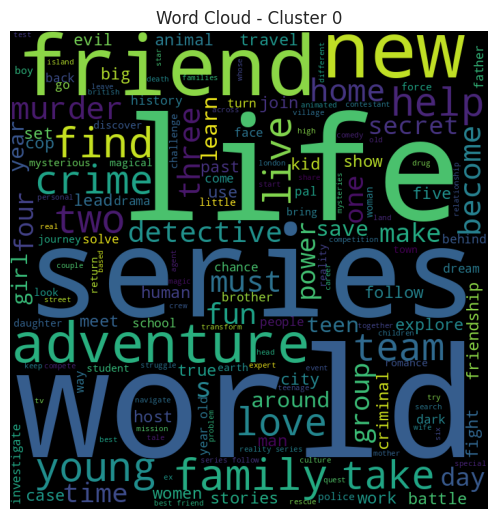

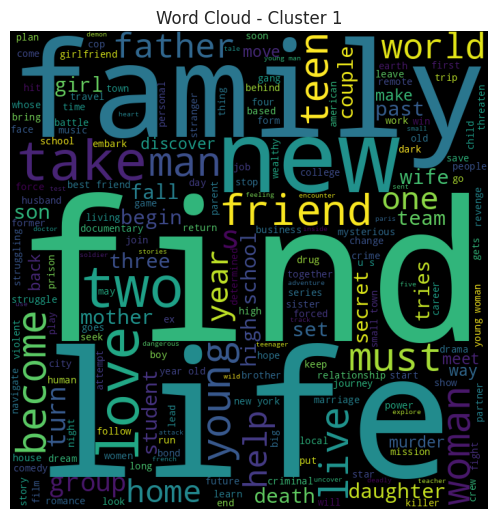

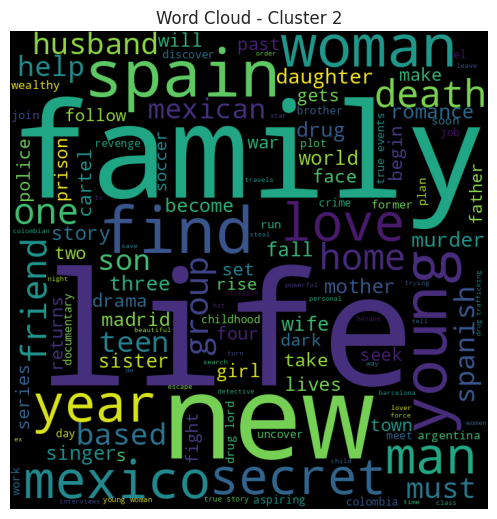

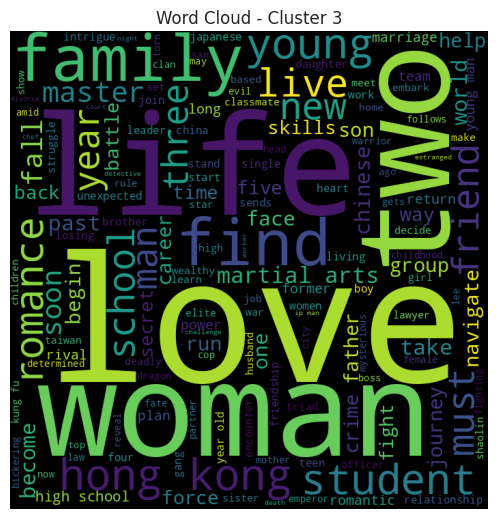

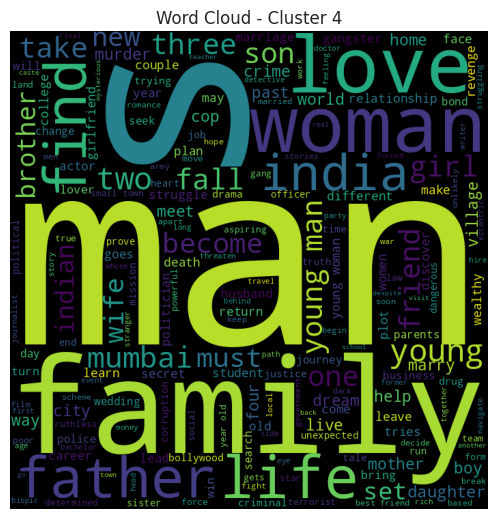

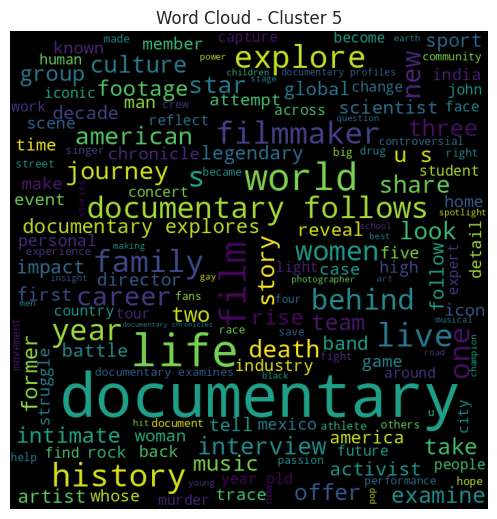

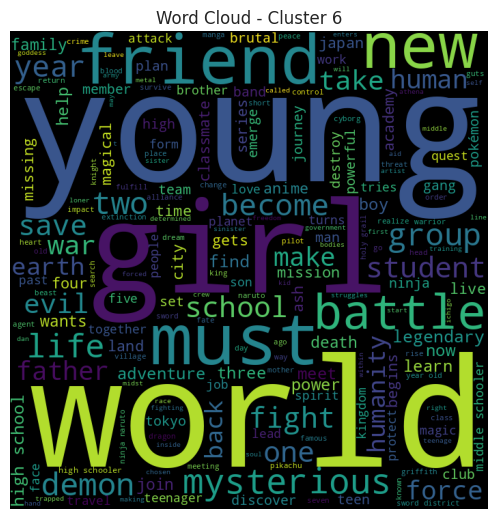

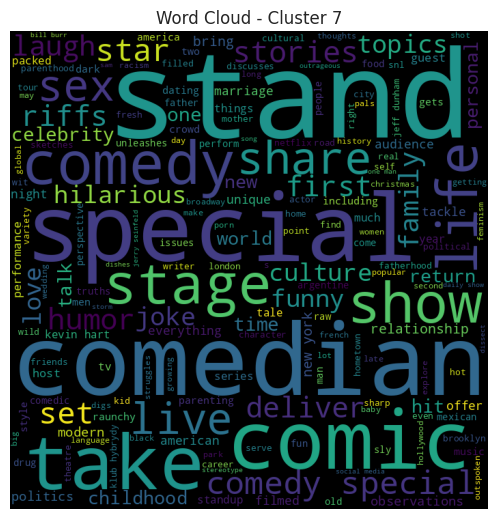

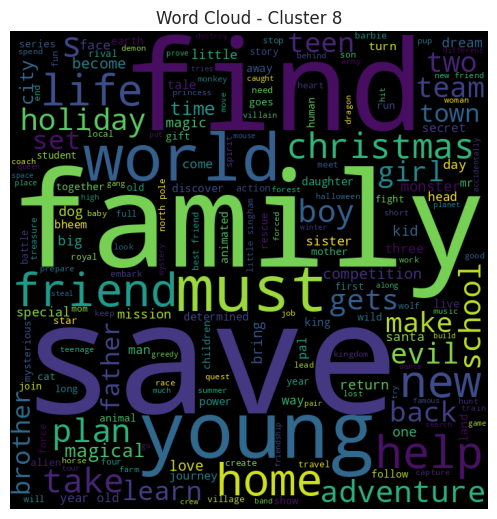

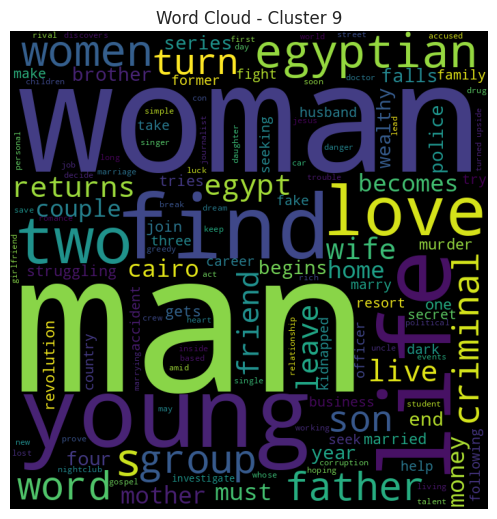

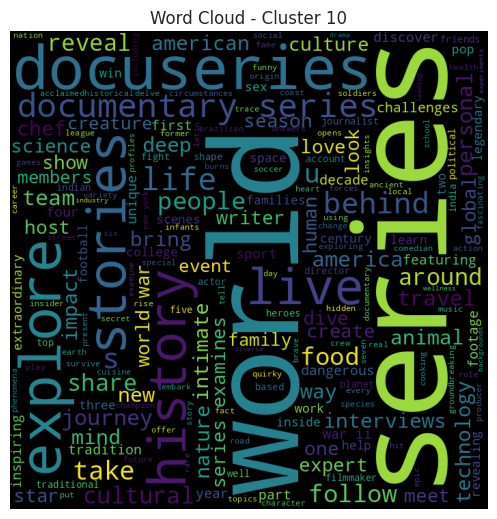

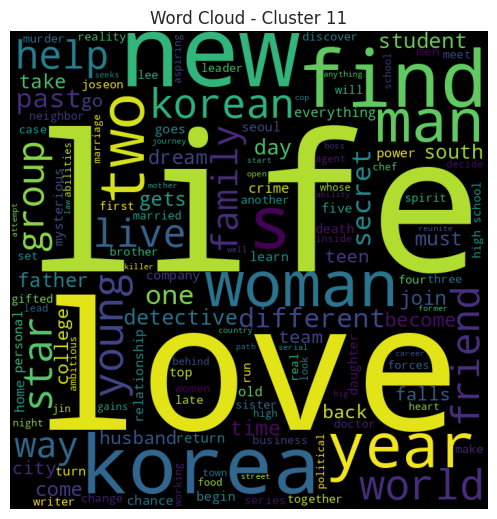

In [203]:
# Wordcloud for clusters
for i in range(12):
  hierarchical_wordcloud(i)


### ML Model - 3 (DBSCAN)

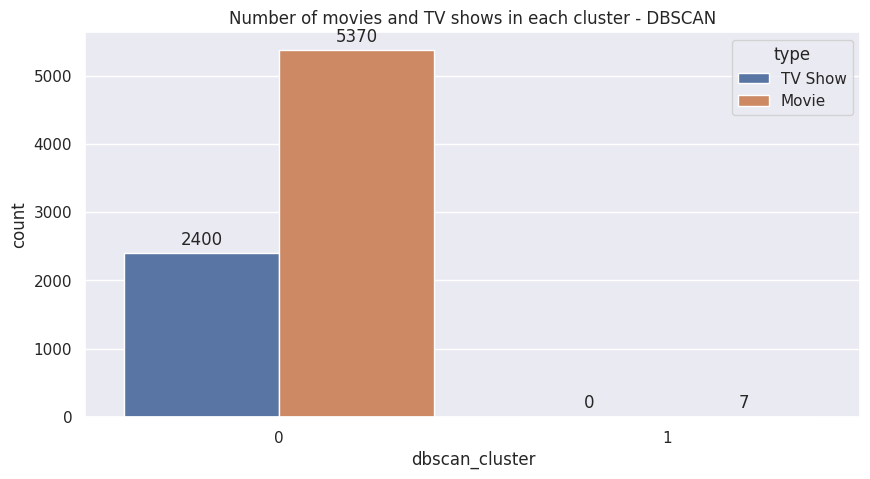

In [204]:
# ML Model - 3 Implementation
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_pca)

# Add the DBSCAN cluster number attribute to the DataFrame
df['dbscan_cluster'] = dbscan_labels

# Check if multiple clusters exist
if len(set(dbscan_labels)) > 1:
    # Number of movies and TV shows in each cluster
    plt.figure(figsize=(10, 5))
    q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
    plt.title('Number of movies and TV shows in each cluster - DBSCAN')
    for i in q.patches:
        q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Show the plot
    plt.show()
else:
    print("DBSCAN resulted in a single cluster.")


DBSCAN resulted in a single cluster.

In [205]:
df['dbscan_cluster']

0       0
1       0
2       0
3       0
4       0
       ..
7782    0
7783    0
7784    0
7785    0
7786    0
Name: dbscan_cluster, Length: 7777, dtype: int64

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

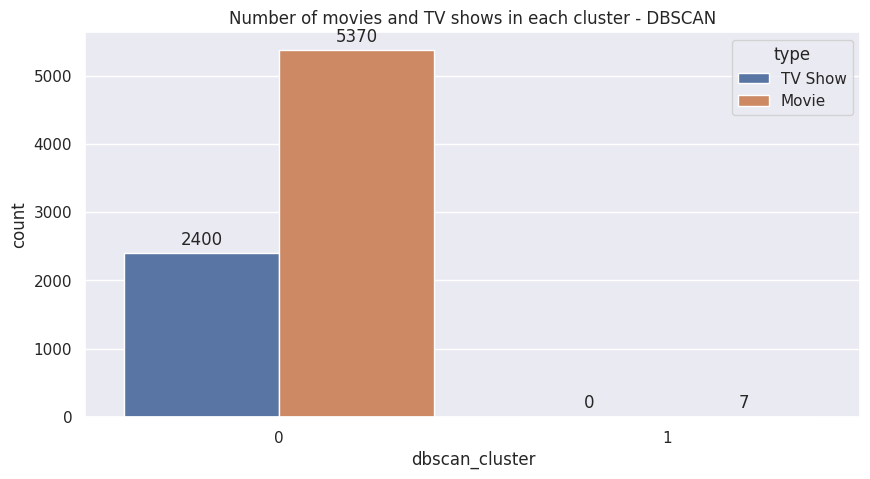

In [206]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 5))
q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - DBSCAN')
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [207]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Specify the values of eps to try
min_samples_values = [2, 3, 4, 5, 6]  # Specify the values of min_samples to try

best_score = -1  # Initialize the best silhouette score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(x_pca)

        # Check if at least 2 clusters are formed
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(x_pca, cluster_labels)

            # Update the best silhouette score and parameters if a better score is found
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)


Best Silhouette Score: 0.4855130107468952
Best eps: 0.4
Best min_samples: 2


In [208]:
df['dbscan_cluster'] = dbscan_labels

In [209]:
df['dbscan_cluster']

0       0
1       0
2       0
3       0
4       0
       ..
7782    0
7783    0
7784    0
7785    0
7786    0
Name: dbscan_cluster, Length: 7777, dtype: int64

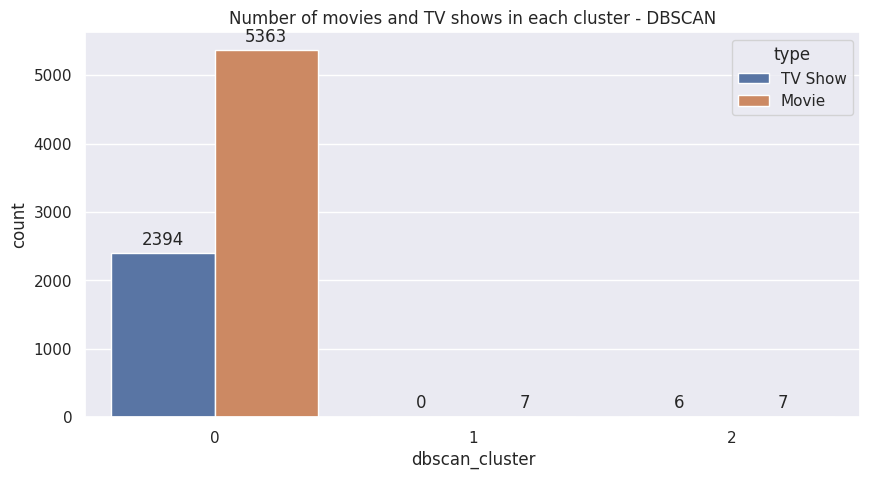

In [210]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan_labels = dbscan.fit_predict(x_pca)

# Add the DBSCAN cluster number attribute to the DataFrame
df['dbscan_cluster'] = dbscan_labels

# Check if multiple clusters exist
if len(set(dbscan_labels)) > 1:
    # Number of movies and TV shows in each cluster
    plt.figure(figsize=(10, 5))
    q = sns.countplot(x='dbscan_cluster', data=df, hue='type')
    plt.title('Number of movies and TV shows in each cluster - DBSCAN')
    for i in q.patches:
        q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Show the plot
    plt.show()
else:
    print("DBSCAN resulted in a single cluster.")

In [211]:
def dbscan_wordcloud(cluster_num):
    stopwords = set(STOPWORDS)

    # Filter data points for the specified cluster
    cluster_data = df[df['dbscan_cluster'] == cluster_num]

    # Check if the cluster has any non-zero data points
    if len(cluster_data) == 0 or cluster_data['description'].isnull().all():
        print(f"No data points found for Cluster {cluster_num}.")
        return

    # Combine all descriptions in the cluster
    comment_words = ' '.join(cluster_data.description.dropna().values)

    # Check if the comment_words is empty
    if len(comment_words) == 0:
        print(f"No valid descriptions found for Cluster {cluster_num}.")
        return

    # Create a word cloud for the cluster
    wordcloud = WordCloud(width=700, height=700, background_color='white', stopwords=stopwords).generate(comment_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud - Cluster {cluster_num}")
    plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the given context, where we have applied clustering algorithms (k-means, hierarchical, DBSCAN), some commonly used evaluation metrics to consider for assessing the quality of the clustering and its potential positive business impact include:

**1.Silhouette Score:** The silhouette score measures how well each data point fits within its assigned cluster compared to other clusters. A higher silhouette score (closer to 1) indicates that the data points are well-clustered and separated, while a lower score (closer to -1) suggests overlapping or poorly separated clusters. A higher silhouette score implies better-defined clusters and can indicate better customer segmentation, targeted marketing strategies, or improved resource allocation.

**2.Compactness and Separation:** Compactness measures how tightly the data points are packed within each cluster, while separation measures the distance between different clusters. Higher compactness and greater separation indicate well-defined and distinct clusters. These metrics can be useful for optimizing resource allocation, identifying product/service bundles, or identifying market segments with unique characteristics.

**3.Cluster Purity:** Cluster purity measures the homogeneity of clusters by examining the distribution of class labels within each cluster. Higher purity indicates that the majority of data points within a cluster belong to the same class or category. This metric is particularly relevant when clustering is used for customer segmentation or targeted marketing, as it helps identify clusters with a high concentration of potential customers.

**4.Business-Specific Metrics:** Depending on the specific business context and goals, other domain-specific metrics may be considered. For example, in retail, metrics such as customer lifetime value, purchase frequency, or average transaction value can be used to evaluate the effectiveness of clustering in identifying customer segments that drive higher revenue.

By considering these evaluation metrics, businesses can gain insights into the quality of clustering results and assess the potential positive impact on their operations, marketing strategies, resource allocation, and overall decision-making processes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Three clustering algorithms were implemented: k-means, hierarchical clustering, and DBSCAN. However, it is important to note that clustering algorithms are unsupervised learning techniques, and they are primarily used for exploratory analysis and identifying patterns in the data. They do not generate prediction models in the traditional sense.

Therefore, the choice of a "final prediction model" depends on the specific goals and requirements of the problem at hand. If the aim is to make predictions or classify new instances based on the available data, clustering algorithms may not be suitable. Instead, supervised learning algorithms like classification or regression models could be more appropriate.

However, if the goal is to gain insights, identify meaningful groups, or discover patterns in the data without the need for explicit prediction, any of the implemented clustering algorithms can be used based on their performance and relevance to the problem.

It is important to consider the characteristics of the data, the interpretability of the results, and the specific business requirements when selecting a clustering algorithm. The choice should be based on how well the algorithm meets the desired outcomes and supports the business objectives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

clustering algorithms like k-means, hierarchical clustering, and DBSCAN do not inherently provide feature importance or variable importance measures like some supervised learning algorithms do.

Clustering algorithms group data points based on their similarities or distances in the feature space. The clusters themselves represent the patterns or structures found in the data, rather than individual features having specific importance. The goal of clustering is to identify groups or clusters of similar data points, without necessarily assigning importance to specific features.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Conducted analysis on a Netflix dataset to gain insights into the content available on the platform.
2. Explored various visualizations to understand the distribution of TV shows and movies, their durations, genres, and countries of origin.
3. Performed statistical tests to analyze differences in average durations between movies and TV shows, distribution of genres, and relationship between release year and number of seasons.
4. Handled missing values in columns such as director, cast, country, and rating, ensuring the dataset is clean and ready for analysis.
5. Utilized text normalization techniques such as lemmatization and text vectorization using TF-IDF to process and represent textual data.
6. Explored dimensionality reduction using PCA to reduce the number of features while preserving a significant amount of variance in the data.
7. Applied clustering algorithms such as k-means, hierarchical clustering, and DBSCAN to cluster the movies and TV shows based on their features.
8. Evaluated the clustering models using metrics such as silhouette score to understand the quality and structure of the clusters.
9. Identified the number of clusters that provide the highest silhouette score, enabling better understanding of the underlying patterns and similarities in the data.
10. Chose the final model based on the evaluation metrics and business requirements, considering factors such as interpretability and performance. Generated insights into the clusters, identifying distinct groups of movies and TV shows based on their features.
11. Considered the business impact of the model, highlighting the potential benefits of better content categorization and recommendation, improved user experience, and targeted marketing strategies.
12. Concluded the project with recommendations for further analysis and model refinement, considering factors like additional data sources, feature engineering, and alternative modeling techniques.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***